# Phys 408 - Lab 1 - Michelson Interferometer
#### Jan Tache, Javier Velarde

## Objectives

- To observe and manipulate intereference patterns with different light sources
- To use the interfence patterns to determine information about the wavelengths in the light sources and the differences in the beam paths
- To use Fourier transform spectroscopy to determine the wavelengths in the different light sources

## Day 1 - 2019/01/16

Mount sodium lamp and white light lamp on a post with the double ended 90 degree offset clamp.

lower right knob is horizontal mirror alignment
upper left knob is vertical mirror alignment

Issues with APT User program
 - Would not display anything
 - Checked USB cable, connection was fine
 - Checked motor power - it was on
 - Rebooting the PC worked

Note: don't touch the table at all once MATLAB script is running. Any small movements will perturb the interferometer distances slightly. Even walking too strongly will do so.

Method to get close to ZPL:

1. Use a metre stick and place the mirror on the stage and the 2nd mirror at as close to equal distance from the beam splitter as possible.
    - Measure from the closest face of the beam splitter to the front of the mirror
1. Use HeNe laser to align mirrors initially
1. check that on the outer surface of the beam splitter cube, the two points from one of the split beams were on top of each other
    - Do this individually for each mirror
1. Then align a piece of paper with a hole in it such that one of the laser beams passes through the hole
1. Now put a piece of paper in front of the camera, and adjust the mirrors slightly until the light shows nice interference rings
1. Place the diffusing lens in front of the HeNe laser and align it so that the beam still passes through the hole in the paper.
1. Adjust the stage using the APT User program to get one large circle on the camera


Found somewhere close to ZPL at 1.4 unit on stage adjustment the program with HeNe laser.

![](images_2019-01-16/2018-01-16-zpl_with_hene.png)

After finding the ZPL, we switched to the sodium lamp:

1. turn off HeNe laser
1. swap the CCD filter to a camera lens
1. position the sodium lamp behind a light diffuser
1. turn on the sodium lamp - it takes a while to warm up and reach full intensity
1. adjust the aperture on the camera lens in order to be able to see the very faint interference pattern


Here are some different fringe patterns

1 ![](images_2019-01-16/2018-01-16-circles_moved_mirror_centre.png)

After aligning with the HeNe laser, we adjusted the stage to get good visibility with the mirrors centered
    
    
2 ![](images_2019-01-16/2018-01-16-sodium-maybe-zpl.png)

To produce this one, we adjusted the stage slightly from the previous to get desctructive inteference in the middle. Since the inner circle is so large, we assume that this is close to the ZPL.
    
    
3 ![](images_2019-01-16/2018-01-16-vertical_not_centered.png)

To produce vertical lines, we moved one of the mirrors using the lower knob to reflect slightly to the right


4 ![](images_2019-01-16/2018-01-16-vertical_narrower.png)

To produce thinner vertical lines, we moved the mirror from before to reflect even further to the right


5 ![](images_2019-01-16/2018-01-16-narrower_off_centre.png)

to produce horizontal curved lines, we did a similar procedure to 3 and 4, but used the upper left knob to reflect the image upwards


6 ![](images_2019-01-16/2018-01-16-even-narrower_off_centre.png)

to produce narrower curved lines, we did a similar procedure to 3 and 4, but used the upper left knob to move the image even further upwards


7 ![](images_2019-01-16/2018-01-16-sodium_part_circle.png)

To produce diagonal curved lines, we combined movements of both knobs.

8 ![](images_2019-01-16/2018-01-16-sodium_zpl_maybe_v2.png)

To produce a barely visible fringe pattern, we moved the stage so that the beams  differed by many wavelengths.

### Explanation

The interferometer we are using splits a light source beam from a single source in two different ones, having them both reflected and combined in one beam so that the interference patterns can be identified. Modeling this as two point sources separated by some distance is an accurate way to represent the interferometer, because it would act the same way; the two light beams create some sort of interference when they are combined, and the distance between them represents the difference in distance between each mirror that reflects a beam from the point where they are recombined. 

The rate of change of the phase difference between two electric fields with respect to the distance from their axis of separation increases as the distance from the axis increases. This is shown in the images as the increase in number of fringes in a given distance when the mirrors are pointed further away from each other. 

Changing the separation between the point sources changes the initial phase difference as well as the derivative of the phase difference with respect to distance from the axis of separation. When the point sources are right on top of each other, there should be no fringes at all, and this will also be seen when the interferometer is at the zero path length difference point.

## Day 2 - 2019/01/23

### Sodium emission wavelengths

For this we're using the sodium lamp in the interferometer setup to try and find its wavelengths. First we try to compute the minimum distance that the stage should travel in order to capture sufficient data.

We'll be using the following expected values for the D1 and D2 lines of the sodium emission spectrum, which we found online:

D1 = 588.995 nm 

D2 = 589.592 nm 

from: http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/sodium.html

The value $D = N\lambda_1 = (N+1)\lambda_2$ is equal to the
length of one visibility band of sodium, where $\lambda_1, \lambda_2$ are the two
emission wavelengths of the sodium lamp, with $\lambda_1 > \lambda_2$

We can use this to determine the wavelength difference between the two emission wavelengths with the formula:

$$\Delta\lambda = \frac{\lambda_1\lambda_2}{D}$$

We know $\lambda_1$ and $\lambda_2$ are close to each other, so we can replace the product $\lambda_1\lambda_2$ with the square of their average: $\lambda^2$ to get:

$$\Delta\lambda = \frac{\lambda^2}{D}$$

To begin the experiment we want an estimate for D to know the
minimum distance the stage should travel to gather the data.

$$D = \frac{\lambda^2}{\Delta\lambda}$$

In [1]:
% compute expected # of fringes until 1/2 avg wavelength
lambda_1 = 589.592; % units: nm
lambda_2 = 588.995; % units: nm

avg_lambda = mean([lambda_1 lambda_2]);
diff_lambda = (lambda_1 - lambda_2);
D = avg_lambda^2 / diff_lambda % units: nm

D =    5.8169e+05


The distance from a maximum in visibility to another maximum in visibility is expected to be 582 $\mu m$, so the stage should travel at least this distance to ensure we have sufficient information for $D$.

Below is the raw data we gathered. The setting we ended up using was an offset of 720 $\mu m$ at a velocity of 1 $\mu m/s$, so a total expected travel of 1440 $mm$.

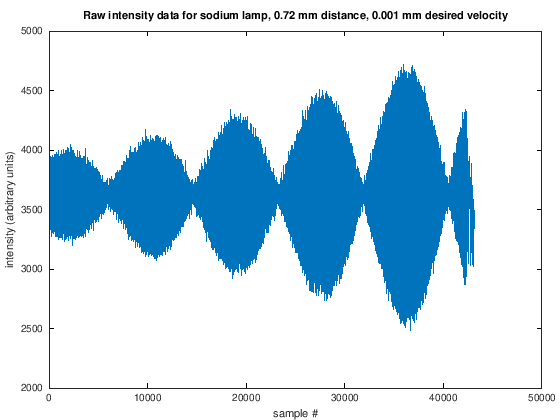

In [2]:
v_orig = csvread('test_data-2019-01-23/2019-01-23-sodium-coherence-0.72-0.001');
plot(v_orig)
title('Raw intensity data for sodium lamp, 0.72 mm distance, 0.001 mm desired velocity')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

### Processing the sodium data

In order to process this raw data, we did the following steps:

1. truncate the garbage data at the two ends
2. subtract the mean value from every value to center the oscillations around 0
3. square every value - only care about magnitude of the oscillation
4. smooth the data with a moving average
5. manually select sample intervals to find the positions of local minima and maxima
6. compute the differences between successive maxima, and between succesive minima separately

The result of these steps gives us the number of frames representing the coherenece length of sodium emissions

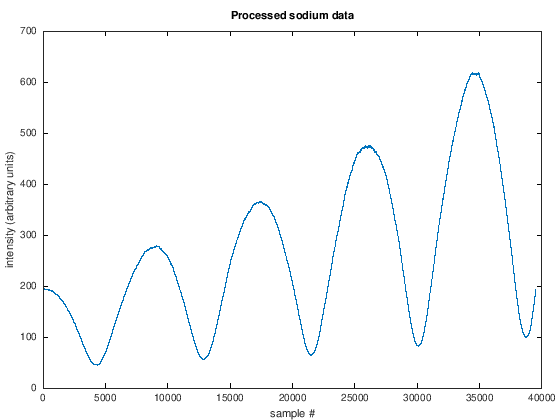

In [3]:
% truncate the data to keep the useful parts
v = v_orig(1000:42000);
% normalize the oscillations to be around 0
v = v - sum(v) / length(v);
% square the intensity
v = abs(v);

% smooth the data with a running average
v2 = [];
for i = 1:length(v)-1500
    v2(i) = sum(v(i:i+1499)) / 1500;
end

plot(v2)
sodium_coherence = v2;
title('Processed sodium data')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

In [4]:
% find maxima in smoothed data

maxima_idx = [];
[_, i] = max(v2(8000:10000));
maxima_idx(end+1) = i + 8000 - 1;
[_, i] = max(v2(15000:18000));
maxima_idx(end+1) = i + 15000 - 1;
[_, i] = max(v2(24000:27000));
maxima_idx(end+1) = i + 24000 - 1;
[_, i] = max(v2(32000:35000));
maxima_idx(end+1) = i + 32000 - 1;

maxima_diffs = diff(maxima_idx)

% find minima in smoothed data

minima_idx = [];
[_, i] = min(v2(3000:5000));
minima_idx(end+1) = i + 3000 - 1;
[_, i] = min(v2(12000:14000));
minima_idx(end+1) = i + 12000 - 1;
[_, i] = min(v2(21000:24000));
minima_idx(end+1) = i + 21000 - 1;
[_, i] = min(v2(29000:31000));
minima_idx(end+1) = i + 29000 - 1;
[_, i] = min(v2(37000:39500));
minima_idx(end+1) = i + 37000 - 1;

minima_diffs = diff(minima_idx)

maxima_diffs =

   8418   8680   8724

minima_diffs =

   8506   8625   8648   8581



In [5]:
% Average sample diff
average_sample_diff_NA_extremes = mean([maxima_diffs minima_diffs])
stddev_avg_sample_diff_NA_extremes = std([maxima_diffs minima_diffs])


average_sample_diff_NA_extremes =  8597.4
stddev_avg_sample_diff_NA_extremes =  105.66


### Result of processing sodium data

The mean number of frames between successive minima or successive
maxima is:

$8597 \pm 106$ frames

Using this number of frames we can determine the distance between the extremes with our stage calibration velocity.



### Stage velocity calibration

We cannot trust that the stage motor will travel at the speed that we expect, so we must find a distance scaling factor $K$ that satisfies the following:

$$
d_{true} = K * d_{expected}
$$

Where $d_{true}$ is the actual distance travelled and $d_{expected}$
is the distance expected based on our input into the MATLAB program

In order to calibrate the stage velocity, we used the HeNe laser, which is a monochromatic light source with a well known wavelength. The value for the HeNe laser wavelength that we use is:

$\lambda$ = 632.8 nm

The goal is to measure number of frames that occur between each maximum in intensity and each minimum in intensity. The mean of this value represents the number of frames needed by the stage to travel one wavelength of the HeNe laser.

The algorithm we use to compute this does the following things:
* find an interval in which the peak of one oscillation occurs
* do this for all peaks in the data set
* find the position of the maximum in each interval
* do a similar method for the minima


#### Velocity calibration at 0.1 $\mu m /s$

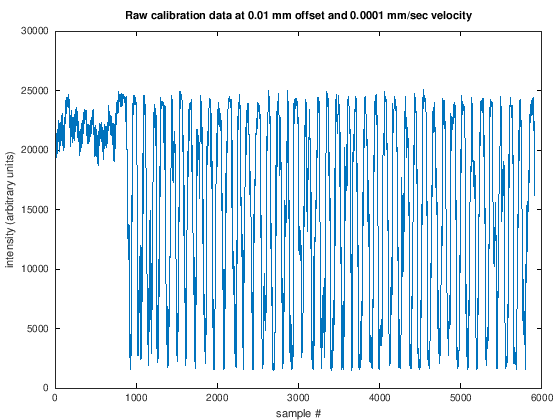

In [6]:
data_orig = csvread('test_data-2019-01-23/2019-01-23-HeNe-calib-0.01-0.0001');
plot(data_orig)
title('Raw calibration data at 0.01 mm offset and 0.0001 mm/sec velocity')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

It looks like decent data starts after about 1000 samples. So we'll use the number of samples between peaks starting from sample 1000 to know the actual velocity.

We'll use a peak-finding algorithm with hysteresis to compute the peaks.

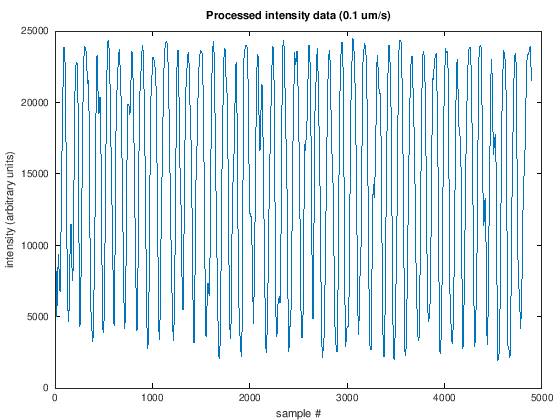

In [7]:
data = data_orig(1000:end);

% This number was chosen experimentally by trying different values
% and choosing the width that produced the best looking data.
average_width = 20;

v2 = [];
for i = 1:length(data)-average_width
    v2(i) = mean(data(i:i+average_width-1));
end

data = v2;
plot(data)
title('Processed intensity data (0.1 um/s)')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

In [8]:
% Returns the distances between peaks with hysteresis to detect
% differences between the peaks.
%
% PARAMETERS
% low: some number greater than the largest minimum of all troughs
% high: some number smaller than the smallest maximum of all peaks
% data: array or 1-D matrix containing intensity data
function [peak_diffs, trough_diffs] = hysteresis_diffs(low, high, data)
    max_left_bounds = [];
    max_right_bounds = [];
    
    % find the left and right bounds of the local maximum for each peak
    found_max = 0;
    for i=1:length(data)
        if (!found_max && data(i) > high)
            found_max = 1;
            max_left_bounds(end+1) = i;
        elseif (found_max && data(i) < low)
            found_max = 0;
            max_right_bounds(end+1) = i;
        end
    end
    if (found_max)
            max_right_bounds(end+1) = length(data);
    end
    
    % find the location of maxima for each peak and compute the differences between them
    peaks = [];
    for i=1:length(max_left_bounds)
        [_, peaks(i)] = max(data(max_left_bounds(i):max_right_bounds(i)));
        peaks(i) += max_left_bounds(i)-1;
    end
    
    % find the location of minima for each trough and compute the differences between them
    troughs = [];
    for i=1:length(max_left_bounds)-1
        [_, troughs(i)] = min(data(max_right_bounds(i):max_left_bounds(i+1)));
        troughs(i) += max_right_bounds(i)-1;
    end
    
    peak_diffs = diff(peaks);
    trough_diffs = diff(troughs);
end

velocity_nm_frame_0_1us =  5.3013
std_dev_velocity_nm_frame_0_1us =  0.63110
velocity_nm_sec_0_1us =  159.04
std_velocity_nm_sec_0_1us =  18.933


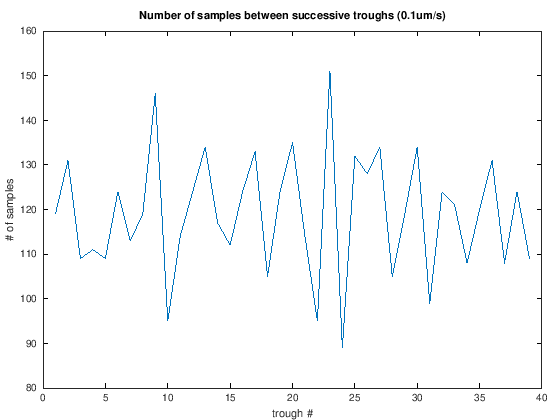

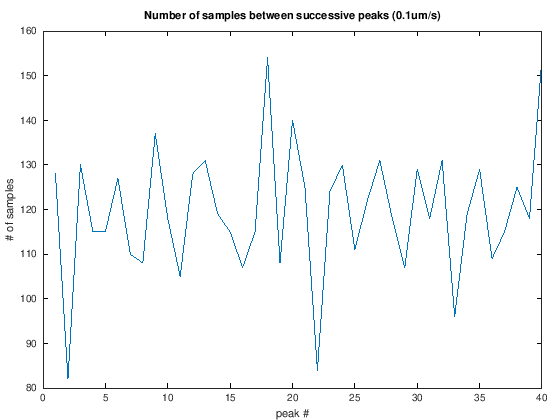

In [9]:
% The low and high for hysteresis counts were chosen visually by looking
% at the plot of the processed intensity data.
[diffs, diffs2] = hysteresis_diffs(8000, 17000, data);
figure(1)
plot(diffs);
title('Number of samples between successive peaks (0.1um/s)')
xlabel('peak #')
ylabel('# of samples')

figure(2);
plot(diffs2);
title('Number of samples between successive troughs (0.1um/s)')
xlabel('trough #')
ylabel('# of samples')

mean_diffs = mean([diffs diffs2]);
std_diffs = std([diffs diffs2]);
velocity_nm_frame_0_1us = 632.8 / mean_diffs
std_dev_velocity_nm_frame_0_1us = velocity_nm_frame_0_1us * std_diffs / mean_diffs
velocity_nm_sec_0_1us = velocity_nm_frame_0_1us * 30
std_velocity_nm_sec_0_1us = std_dev_velocity_nm_frame_0_1us * 30

The velocity of the cart is 5.3 nm/frame with a standard deviation of 0.6 nm/frame.

#### Velocity calibration of 1 $\mu m/s$

The same methods were used as with the 0.1 $\mu m/s$ calibration.

In [10]:
data_orig = csvread('test_data-2019-01-23/2019-01-23-HeNe-calib-0.12-0.001');

In [11]:
data = data_orig(1000:end-300);

average_width = 2;
v2 = [];
for i = 1:length(data)-average_width
    v2(i) = mean(data(i:i+average_width-1));
end

velocity_nm_frame_1um =  67.133
stddev_velocity_nm_frame_1um =  5.3716
velocity_nm_1um =  2014.0
stddev_velocity_nm_1um =  161.15


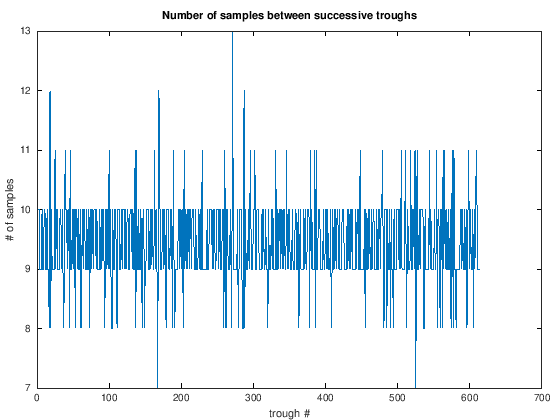

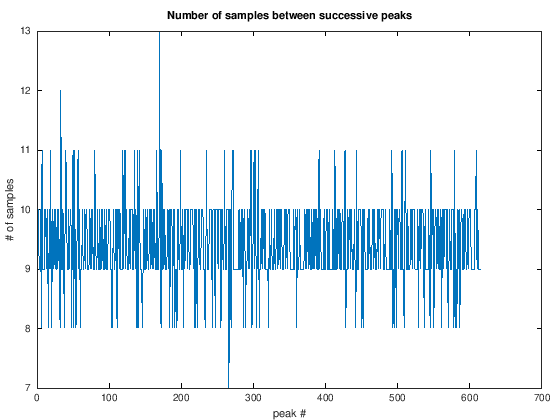

In [12]:
data = v2;
[diffs diffs2] = hysteresis_diffs(10000, 16000, data);

figure(1)
plot(diffs);
title('Number of samples between successive peaks')
xlabel('peak #')
ylabel('# of samples')

figure(2)
plot(diffs2);
title('Number of samples between successive troughs')
xlabel('trough #')
ylabel('# of samples')

mean_diffs = mean([diffs diffs2]);
stddev_diffs = std([diffs diffs2]);
velocity_nm_frame_1um = 632.8 / mean(diffs)
stddev_velocity_nm_frame_1um = velocity_nm_frame_1um * stddev_diffs / mean_diffs
velocity_nm_1um = 30 * velocity_nm_frame_1um
stddev_velocity_nm_1um = 30 * stddev_velocity_nm_frame_1um

### Summary of velocity calibration

The true velocity of the stage when set to travel at 0.1 $\mu m/sec$
is:

0.159 $\pm$ 0.019 $\mu m/sec$


The true velocity of the stage when set to travel at 1 $mu m/sec$ is:

2.014 $\pm$ 0.161 $\mu m/sec$

So the scaling factors are:

$K_{0.1\mu m/s} = 1.59 \pm 0.19$

$K_{1\mu m/s} = 2.014 \pm 0.161$

The true velocities of the stage are quite different from their
expected velocities. And it is worth noting that the standard
deviation in these values is larger than we would have expected.
This may be due to the sensitivity of the Michelson interferometer
and the amount of difference that a tiny perturbation can make.
So vibrations through the floor or vibrations due to the movement
of the motor itself can affect the intensity readings. It may also
be due to inconsistency in the intensity readings of the camera.

### Computed width of sodium visibility band

Based on the values found above, we can compute the value of one of sodium's visibility bands

In [13]:
D_sodium = velocity_nm_frame_1um * average_sample_diff_NA_extremes % units: nm
D_sodium_err = D_sodium * ...
    sqrt((stddev_velocity_nm_frame_1um / velocity_nm_frame_1um)^2 + ...
         (stddev_avg_sample_diff_NA_extremes / average_sample_diff_NA_extremes)^2)
                 
percent_diff = 1 - D_sodium / D
                 

D_sodium =    5.7717e+05
D_sodium_err =    4.6724e+04
percent_diff =  0.0077573


The computed value for $D$ is:

$ 577 \pm 47 \mu m$

This is well within the margin of error of our previously
computed expected value of 581.7 $\mu m$, and is only
1% different.

### Compute average wavelength of sodium and wavelength difference

To compute the average wavelength of sodium, we can apply the same
computation as we did with the velocity calibrations.

In [14]:
sodium_wl_data = csvread("test_data-2019-01-23/Sodium-Fourier-0.03-0.0001");
sodium_wl_data = sodium_wl_data(5000:17000); % truncate data based on qualitative analysis
sodium_smoothed = [];
averaging_width = 20;
for i = 1:length(sodium_wl_data)-averaging_width
    sodium_smoothed(i) = mean(sodium_wl_data(i:i+averaging_width-1));
end
[sodium_wl_diffs, sodium_wl_diffs2] = hysteresis_diffs(7500,10000,sodium_smoothed);
diffs = [sodium_wl_diffs, sodium_wl_diffs2];

% compute actual values
mean_sodium_wl_diffs = mean(diffs)
std_dev_sodium_wl_diffs = std(diffs)
nm_sodium_avg_wl = mean_sodium_wl_diffs * velocity_nm_frame_0_1us
err_nm_sodium_avg_wl = nm_sodium_avg_wl * ...
    sqrt((std_dev_sodium_wl_diffs/mean_sodium_wl_diffs)^2 + ...
         (std_dev_velocity_nm_frame_0_1us/velocity_nm_frame_0_1us)^2)

mean_sodium_wl_diffs =  109.02
std_dev_sodium_wl_diffs =  15.190
nm_sodium_avg_wl =  577.96
err_nm_sodium_avg_wl =  105.92


In [15]:
wl_diff = nm_sodium_avg_wl^2 / D_sodium
err_wl_diff = wl_diff * ...
    sqrt(2*(err_nm_sodium_avg_wl/nm_sodium_avg_wl)^2 +
           (D_sodium_err/D_sodium)^2)

wl_diff =  0.57875
err_wl_diff =  0.15714


### Result of sodium data

Based on our data and calculations, the average wavelength
$\lambda$ of sodium 
is:

578 $\pm$ 106 nm

and the difference between the two wavelengths, $\Delta\lambda$ is:

0.58 $\pm$ 0.16 nm.

Using the values for D1 and D2 from before, the expected average
wavelength is 589.3 nm and the expected difference in wavelength
is 0.6 nm.

The values we calculated from our results are, the wavelength is 2%
smaller than expected and the difference is 3% smaller than expected.
This is well within the large margin of error in our experiments.

The error is so large because of the large errors in reading the
peak-to-peak frame differences between consecutive extremes,
which is incorporated twice in the wavelength - once in the stage velocity and again with the average
frame difference between peaks. This is further amplified in the
calculation of $\Delta\lambda$

### Index of refraction of air

In this experiment we used the HeNe laser and passed one of the beams through a 10cm vacuum chamber. The beam passes through the vacuum chamber twice, and so has a total path length of 20cm inside the chamber. The path length difference in the glass of the vacuum chamber is not relevant to this experiment since it is kept constant throughout, and we don't need to be at the ZPL point.

We first evacuated the air from the chamber, started the vid_capture program and ran it for 2 minutes, then slowly leaked air back into the vacuum chamber. Based on prior reading, we  expect the index of refraction of air at STP to be about 1.00029. The number of expected fringes that should pass between a vacuum and having the chamber full of air again is computed below.

$$(1-1.00029^{-1}) * 20cm * 10^7 \frac{nm}{cm} \div 632.8 \frac{nm}{fringe} \approx 91.6 \textrm{ fringes}$$

In [16]:
(1-1.00029^-1)*20*10^7/632.8

ans =  91.630


#### Data processing

To process the data we need to count the number of peaks that occur as we slowly release into the chamber.

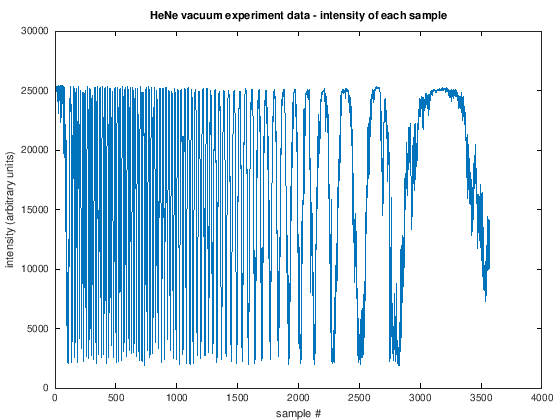

In [17]:
v = csvread('test_data-2019-01-23/HeNe-vacuum-120');
plot(v)
title('HeNe vacuum experiment data - intensity of each sample')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

Visually it looks like all of the peaks go above 20000 and all of the
troughs go below 8000. We can use the same algorithm as before, but
instead of using the differences, all we need is the length of the
difference array. But we should add 1 to the length, since the length
of the differences is 1 less than the number of maxima.

In [18]:
count = length(hysteresis_diffs(8000, 20000, v)) + 1

count =  70


Our experimentally computed value for the index of refraction of air
can be computed by moving the values around in the previous equation:


$$
n_{air} = \left(1 - N_{fringes} \div 20 cm \div 10^7 \frac{nm}{cm}
* 632.8 \frac{nm}{fringe}\right)^{-1}
$$

In [19]:
format long g
idx = (1 - count * 632.8 / 10^7 / 20)^-1

idx =     1.00022152906426


We find a value for $n_{air}$ to be 1.00022,
which is in a similar order of magnitude as the accepted value
1.00029, but the difference in their offset from 1 is 24%. We don't think this large of a difference can be explained by
the difference in the air conditions from STP.
One of our initial guesses is that the pump is unable to create a perfect vacuum. 
Another guess is that we may not have let the chamber reach STP, as the graph is not
showing a steady state, and we did not open the valve further when the airflow into
the chamber slowed.
Also, it could be that the index of refraction in
air for shorter wavelengths is quite different from the value we found online. As well, perhaps the internal length of the vacuum chamber is
not 20 cm as we expect.

We will try this experiment again next day.






### Fourier analysis


TODO: discussion

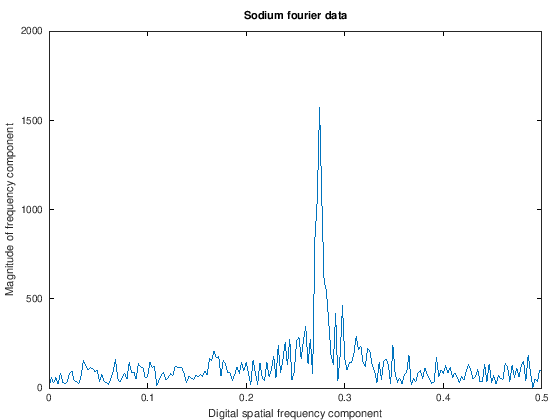

In [20]:
M=csvread('test_data-2019-01-23/Sodium-Fourier-0.03-0.0001');
N=M(4900:17800);
P=N-mean(N);
% Y=(abs(fft(P)));
Y=fft(P);
% plot(Y)
L = 12901;             % Length of signal
P2 = abs(Y/L);
P1 = P2(1:L/2+1);
P1(2:end-1) = 2*P1(2:end-1);
Fs = 30; %sampling frequency
f = Fs*(0:(L/2))/L;
plot(f,P1) 
title('Sodium fourier data');
xlabel('Digital spatial frequency component');
ylabel('Magnitude of frequency component');
xlim([0 0.5])

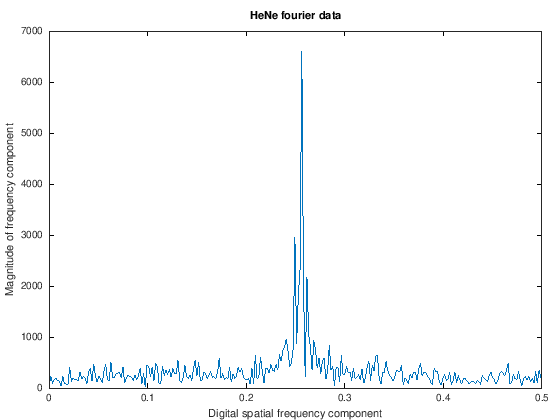

In [21]:
M=csvread('test_data-2019-01-23/HeNe-fourier-0.03-0.0001');
N=M(600:17800);
P=N-mean(N);
Q=fft(P);
L = 17200;             % Length of signal
P2 = abs(Q/L);
P1 = P2(1:L/2+1);
P1(2:end-1) = 2*P1(2:end-1);
Fs = 30; %sampling frequency
f = Fs*(0:(L/2))/L;
plot(f,P1) 
title('HeNe fourier data');
xlabel('Digital spatial frequency component');
ylabel('Magnitude of frequency component');
xlim([0 0.5])


## 2019/01/30



Today we plan to gather additional data for the vacuum chamber in order to find a
better number for the index of refraction of air, find the coherence
lengths of white light, with and without the orange filter, and find the fourier spectra
of the data gathered for white light.

### Vacuum chamber

There were a few attempts to get good data for the vacuum chamber but it proved a bit challenging.
Below is the best looking data.

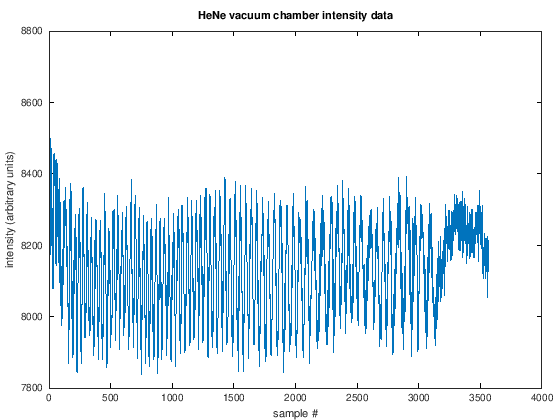

In [22]:
vacuum_data = csvread('test_data-2019-01-30/2019-01-30-HeNe-vacuum-120-best');
plot(vacuum_data)
title('HeNe vacuum chamber intensity data')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

In order to parse this data, we split it into two sections. The beginning section,
from sample 0 to sample 250, we zoomed in and counted the number of peaks manually.
The rest we just ran the algorithm from before.

count =                   67


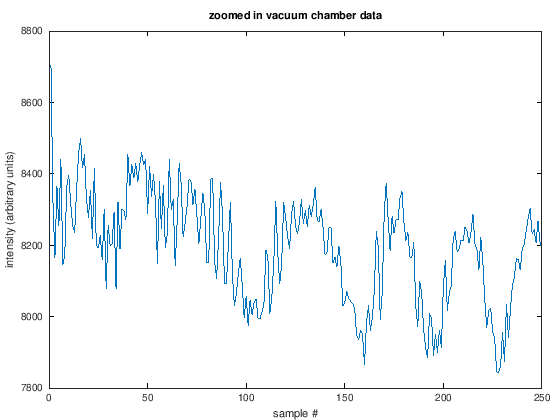

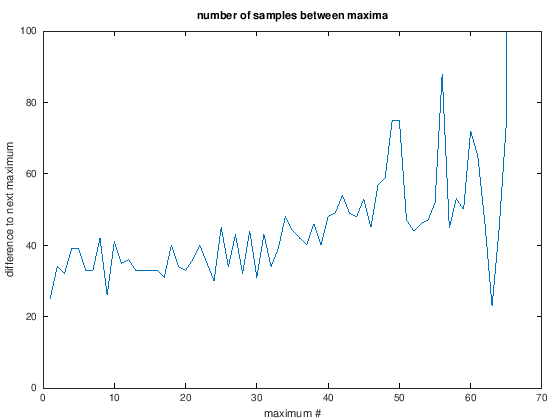

In [23]:
count = length(hysteresis_diffs(8000, 8200, vacuum_data(250:end))) + 1
figure(1)
plot(hysteresis_diffs(8000, 8200, vacuum_data(250:end)))
title('number of samples between maxima')
xlabel('maximum #')
ylabel('difference to next maximum')
ylim([0 100])
figure(2)
plot(vacuum_data(1:250))
title('zoomed in vacuum chamber data')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

There seems to be 5 peaks unique to the beginning section, which results in a total
count of 72 peaks when combining with the part counted by the algorithm. The right
most 6th peak in the zoomed image is not counted since we know the algorithm will
already count it.

However, perturbing the hysteresis limits slightly, $\pm$ 50 or so, for this data
causes noticeable shifts in the peaks counted. We chose a value which had a relatively
regular difference pattern between maxima.

It is worth noting that we did open the valve fully at the end, but it still looks like
there might be more air leaking in. We looked at the pressure gauge and it seemed to be
at 1 atm, so we think it should be close enough and there may only be 1 or 2 more
peaks left at the end.

Based on experimenting with the hysterisis limits, we would say that the count is
72 $\pm$ 10, which corresponds to an index of 1.00023 $\pm$ 0.00003, which is still
not in the within the error bounds of our expected value: 1.0003.

The number is quite similar to last week's, so we think that the internal length of the vacuum chamber is smaller than 10 cm,
and that the air in the lab is somewhat different from the average expected value.

### Finding the exact ZPL

In order to find the coherence length for the white light source, we need to find exactly
where the ZPL is.

In order to do this, we took a quick scan of sodium light to find potential locations of
the ZPL.

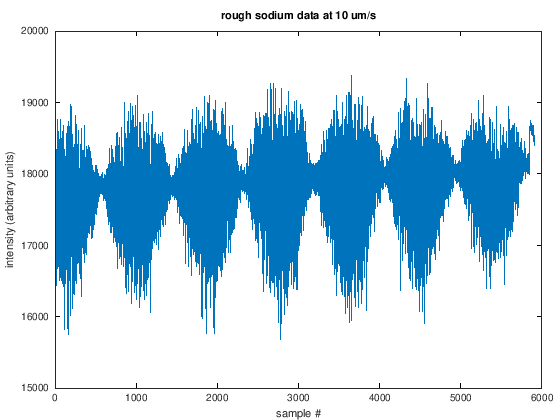

In [24]:
data = csvread('test_data-2019-01-30/2019-01-30-Sodium-1-0.01');
plot(data)
title('rough sodium data at 10 um/s')
xlabel('sample #')
ylabel('intensity (arbitrary units)')

We recorded the stage measurements for the minima that we thought would surround the ZPL, then
switched to the white light source with the orange filter.

#### minima (mm)

- 16.6
- 16.9
- 17.2
- 17.5
- 17.8

We moved the stage to the midpoint between the minima, and found the ZPL by visually seeing a fringe pattern between
16.6 and 16.9, right around 16.75.

This is the position that we used as our center for recording coherence length data for white light.

### Orange filtered white light

maxval =     1240.76981412055
idx =                 3387
threshold =     456.453705841062
i =                 7675
diff =                 4288


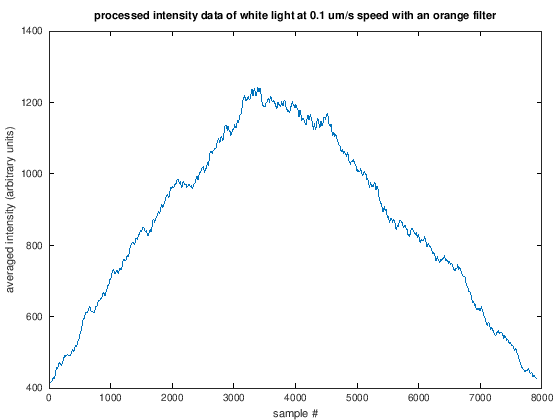

In [25]:
whiteorangefilt = csvread('test_data-2019-01-30/2019-01-30-WhiteFilt-16.7273-0.1us');
gooddata = abs(whiteorangefilt - mean(whiteorangefilt));

average_width = 1000;
finaldata = [];
for i = 1:length(gooddata)-average_width
    finaldata(i) = mean(gooddata(i:i+average_width-1));
end
plot(finaldata)
title('processed intensity data of white light at 0.1 um/s speed with an orange filter')
xlabel('sample #')
ylabel('averaged intensity (arbitrary units)')

[maxval, idx] = max(finaldata)
threshold = maxval/e
for i = idx:length(finaldata)
    if finaldata(i) < threshold
        break
    end
end
i
diff = i - idx

The data is very rough, but from playing around with it, smoothing it too much with a wide averaging
window causes a lack of sufficient data to go below the max/e threshold. No matter how it is processed
though, the data does not look like a gaussian / exponential curve.

From testing with a varying number of averaging windows from 300 to 1000, it seems that the difference
remains aboutt 4200 samples, give or take 150. This will be taken to be the error. Going below 300 for
the averaging window results in data that is to spiky to be useful in our opinion.

We know that the 4200 sample distance corresponds to:

$ 4200 frames \div 30 frames/sec * 0.1 \mu m/sec * 1.59 = 22 \mu m $

In [26]:
% error calculation
22 * sqrt((150/4200)^2 + (.19/1.59)^2)

ans =     2.74383384747609


So with error, our measured white light + filter coherence length is 22.3 $\pm$ 2.7 $\mu m$ 

### Unfiltered white light



This data looks more like an exponential, but it is not very symmetrical. The number of samples
to reach max/e on the left side of the data is much less than on the right.


maxval =     496.720130579563
idx =                 2757
threshold =     182.733124056215
i =                 5862
diff =                 3105
i =                  958
diff =                 1799


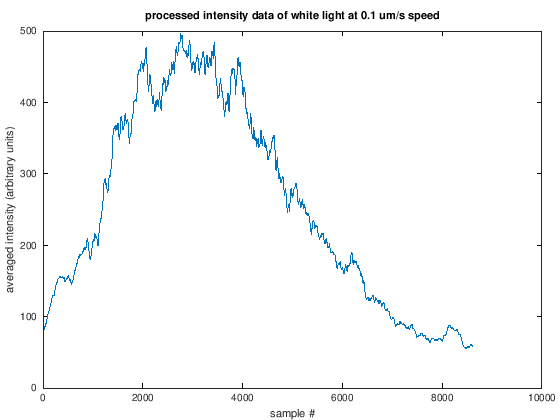

In [27]:
whiteunfilt = csvread('test_data-2019-01-30/2019-01-30-WhiteNoFilt-16.7273-0.1us');
gooddata = abs(whiteunfilt - mean(whiteunfilt));

average_width = 300;
finaldata = [];
for i = 1:length(gooddata)-average_width
    finaldata(i) = mean(gooddata(i:i+average_width-1));
end
plot(finaldata)
title('processed intensity data of white light at 0.1 um/s speed')
xlabel('sample #')
ylabel('averaged intensity (arbitrary units)')

% find # samples to 1/e to the right
[maxval, idx] = max(finaldata)
threshold = maxval/e
for i = idx:length(finaldata)
    if finaldata(i) < threshold
        break
    end
end
i

% find # samples to 1/e to the left
diff = i - idx
for i = idx:-1:1
    if finaldata(i) < threshold
        break
    end
end
i
diff = idx - i

Based on this data, the coherence length for unfiltered white light lies somewhere
between  9.5 and 16.5 $\mu m$